In [23]:
import pandas as pd

lyrics_df = pd.read_csv('data/lyrics.csv')

In [20]:
"""import string, re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer


def remove_punc(lyrics):
    return "".join([c for c in lyrics if c not in string.punctuation])

def remove_stopwords(lyrics):
    return [w for w in lyrics if w not in stopwords.words('english')]

markers = ['[', ']','Verse' ,'1', '2','3', 'Chorus', 'Spoken Intro', 'Intro', 'Bridge']
def remove_markers(lyrics):
    return [w for w in lyrics if w not in markers]

lyrics = []
tokenizer = RegexpTokenizer(r'\w+')

lyrics_df['lyrics'] = lyrics_df['lyrics'].apply(lambda x: remove_punc(x))
lyrics_df['lyrics'] = lyrics_df['lyrics'].apply(lambda x: tokenizer.tokenize(x))
lyrics_df['lyrics'] = lyrics_df['lyrics'].apply(lambda x: remove_markers(x))
lyrics_df['lyrics'] = lyrics_df['lyrics'].apply(lambda x: remove_stopwords(x))
lyrics_df['lyrics'].head(20)"""

0     [Youve, never, met, But, still, greets, like, ...
1     [In, foreign, place, saving, grace, feeling, T...
2     [Arabellas, got, interstellargator, skin, boot...
3     [Get, way, mister, With, short, sharp, tips, N...
4     [Topless, models, Semaphore, Wave, flags, walk...
5     [Lately, Ive, seeing, things, belly, button, p...
6     [I, wanted, one, The, Strokes, Now, look, mess...
7     [Fools, parade, cavort, carry, waiting, eyes, ...
8     [You, got, HP, Lovecraft, Your, Edgar, Allan, ...
9     [Do, bad, thing, Take, wedding, ring, Oh, make...
10    [Jesus, day, spa, filling, information, form, ...
11    [I, got, eyes, youre, everything, I, see, I, w...
12    [Outside, cafe, cracker, factory, You, practic...
13    [Sank, calculations, snorted, stench, Of, arit...
14    [You, got, lights, afternoon, An, nights, draw...
15    [Here, come, old, flat, top, come, Groovin, sl...
16    [Instrumental, She, marrying, matador, weather...
17    [When, leave, us, patient, doors, That, ra

In [24]:
tranqulity_df = lyrics_df[lyrics_df['album'] == 'Tranquility Base Hotel & Casino']
##tranqulity_df['lyrics'] = tranqulity_df['lyrics'].apply(lambda x: ' '.join(x))
##lyrics_df['lyrics'] = lyrics_df['lyrics'].apply(lambda x: ' '.join(x))

In [25]:
import spacy
from collections import Counter
sp = spacy.load('en_core_web_sm')
complete_doc = sp(' '.join([i for i in lyrics_df['lyrics']]))
words = [token.text for token in complete_doc
         if not token.is_stop and not token.is_punct]
word_freq = Counter(words)
# 5 commonly occurring words with their frequencies
common_words = word_freq.most_common(15)
print (common_words)
#more here https://realpython.com/natural-language-processing-spacy-python/

[('\n', 4334), ('\n\n', 706), ('Verse', 299), ('Chorus', 280), ('know', 167), ('like', 145), ('2', 132), ('1', 131), ('Oh', 126), ('got', 124), ('la', 114), ('love', 81), ('want', 80), ('said', 75), ('yeah', 74)]


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()
x = v.fit_transform(tranqulity_df['lyrics'])
print(v.get_feature_names())

['1984', '2019', '70s', 'absolutely', 'accepted', 'access', 'across', 'adjust', 'admit', 'advances', 'advertise', 'advice', 'afternoon', 'age', 'aint', 'all', 'along', 'alright', 'america', 'american', 'ancient', 'and', 'anorl', 'another', 'answers', 'anymore', 'apocalypse', 'apparition', 'arent', 'around', 'arts', 'ascension', 'ask', 'at', 'aura', 'away', 'baby', 'back', 'bad', 'balls', 'band', 'bandana', 'bar', 'barge', 'bars', 'base', 'bastard', 'batphone', 'battery', 'battleground', 'beams', 'bear', 'beautiful', 'became', 'because', 'behind', 'believe', 'bendable', 'bender', 'best', 'big', 'bits', 'blade', 'blinds', 'blood', 'bloody', 'blush', 'boob', 'booth', 'bottle', 'bottom', 'bought', 'boys', 'brain', 'brawl', 'breaking', 'breathe', 'bridge', 'briefcase', 'bucket', 'bukowski', 'but', 'button', 'by', 'call', 'called', 'came', 'can', 'cannot', 'cant', 'cap', 'casino', 'catch', 'cause', 'celebrate', 'chance', 'changed', 'changes', 'character', 'chat', 'cheap', 'cheek', 'cheesebur

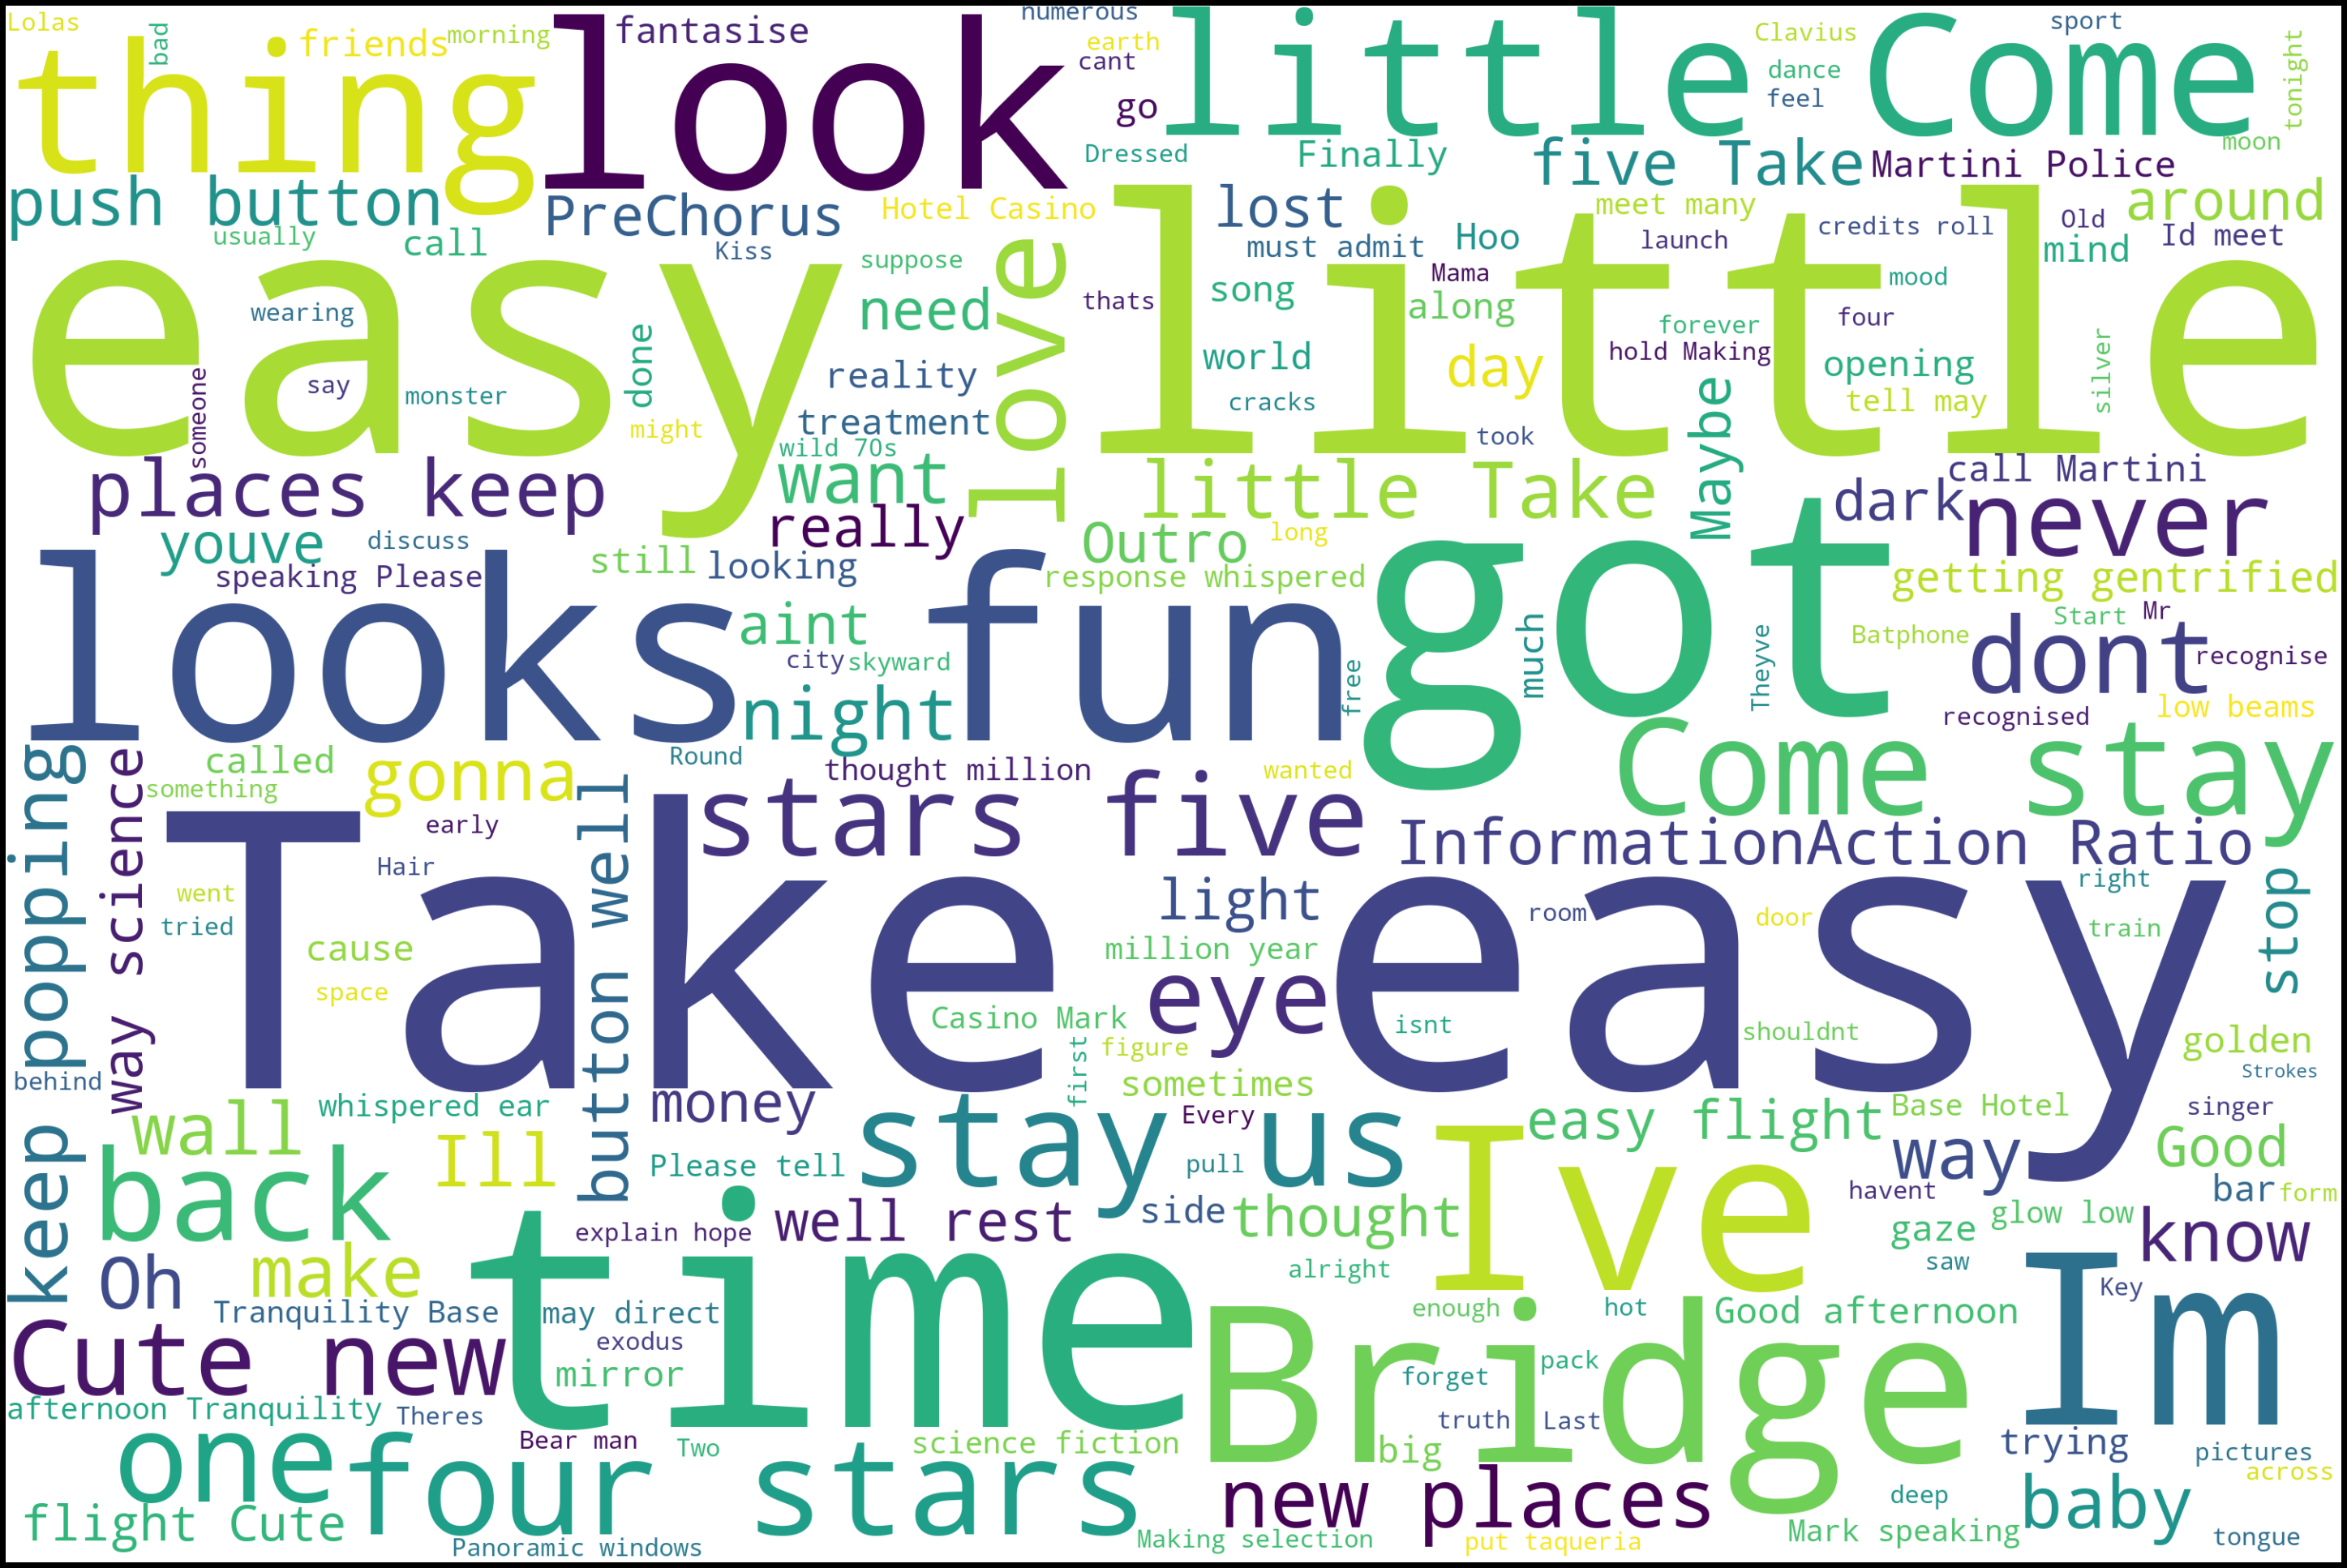

In [53]:
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = tranqulity_df.lyrics.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()